<a href="https://www.kaggle.com/code/joeportilla/clasificaci-n-dataset-iris-regresi-n-log-stica?scriptVersionId=124876532" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 0. Introducción

<img src="https://raw.githubusercontent.com/JoePortilla/IrisDataset-Classification/main/img/iris_lr_github.png" width="800" alt="logo" style="display:block;margin:auto;">

El dataset `Iris` es un conjunto de datos de clasificación multiclase clásico y muy sencillo. Introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 "The use of multiple measurements in taxonomic problems". El conjunto de datos de Iris contiene cuatro características (longitud y anchura de sépalos y pétalos) de 50 muestras de tres especies de flores Iris (Iris setosa, Iris virginica e Iris versicolor).

<img src="https://raw.githubusercontent.com/JoePortilla/IrisDataset-Classification/main/img/iris_flowers.png" width="800" alt="logo" style="display:block;margin:auto;">

Tras realizar un [análisis exploratorio de datos](https://www.kaggle.com/code/joeportilla/analisis-exploratorio-de-datos-dataset-iris/) para comprender mejor la información. En este notebook se construye un modelo con Regresión Logística que utiliza las características para clasificar las flores con un máximo de precisión.

## Paquetes utilizados:
- Procesamiento de datos: Pandas.
- Procesamiento numérico: NumPy.
- Visualización de datos: Seaborn y Matplotlib.
- Desarrollo del Modelo: Scikit Learn

## Referencias:
- [Analisis Exploratorio de Datos dataset Iris](https://www.kaggle.com/code/joeportilla/analisis-exploratorio-de-datos-dataset-iris)
- [Wikipedia](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris/)

## Instructor:
Joseph Santiago Portilla - Ingeniero Electrónico.
- GitHub: https://github.com/JoePortilla
- Twitter: https://twitter.com/JoePortilla
- LinkedIn: https://www.linkedin.com/in/PortillaJoe
- Kaggle: https://www.kaggle.com/joeportilla

# 1. Ajustes Iniciales

## 1.1 Importación de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Definición de estilo de gráficas

In [2]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-whitegrid")

# 2. Carga de Dataset y Preprocesamiento

## 2.1. Lectura de CSV

In [3]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 2.2. Preprocesamiento

### Renombramiento de columnas 

Se renombran las columnas para facilitar su uso.

In [5]:
df.rename({'SepalLengthCm':'sepal_l',
           'SepalWidthCm':'sepal_w',
           'PetalLengthCm':'petal_l',
           'PetalWidthCm':'petal_w',
           'Species':'species'},
          axis=1, inplace=True)

### Eliminación de columnas

Se elimina la columna 'id', ya que no es necesaria dentro del analisis.

In [6]:
df.drop('Id', axis=1, inplace=True)

### Creación de target númerico

- Se crea una variable objetivo de tipo númerico `target` para poder aplicar algoritmos de aprendizaje supervisado de clasificación que requieren una variable de este tipo. Los algoritmos de clasificación pueden utilizar este target como variable para entrenar el modelo y hacer predicciones. 
- La columna `species` en el dataset iris contiene las etiquetas de clase categóricas (setosa, versicolor, virginica), que no pueden ser utilizadas directamente por muchos algoritmos de clasificación. Por lo tanto, se asigna un número único a cada clase
    - 0: Iris-setosa
    - 1: Iris-versicolor
    - 2: Iris-virginica.

In [7]:
df['target'] = df['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [8]:
df.head(3)

,sepal_l,sepal_w,petal_l,petal_w,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0


# 3. Feature selection

### ¿Qué es Feature selection?
- La selección de características (*feature selection*) es un proceso para elegir un subconjunto con las características (*features*) más relevantes para el problema en cuestión.
- El objetivo es reducir el número de características que se utilizan en un modelo para mejorar su rendimiento e interpretabilidad, además de reducir su complejidad y tiempo de entrenamiento.
- Sin embargo, también puede haber algunos riesgos asociados con la selección de características, como la pérdida de información importante o la introducción de sesgos en el modelo si las características seleccionadas no son representativas del problema en cuestión.

### ¿Cuáles son las features más relevantes en este dataset?

En el [Analisis Exploratorio de Datos](https://www.kaggle.com/code/joeportilla/analisis-exploratorio-de-datos-dataset-iris) se notó que es bastante difícil separar las especies basándose únicamente en una sola característica de los sépalos o los petalos, algunas porciones de las distribuciones se encontraban mezcladas, por lo que se podrían generar errores de clasificación.

En consecuencia, se procedió a realizar un analisis multivariado en donde se encuentra en la longitud de los pétalos y la anchura de los pétalos características muy útiles que indican claramente muchas cosas.

- Tienden a una relación positiva, lo que significa que si uno aumenta, el otro valor también aumenta.
- Las dimensiones de los pétalos son evidentemente más pequeños para setosa, tanto en ancho como en longitud.
- La especie setosa esta claramente agrupada
- Las flores versicolor son más pequeñas que las flores verginica, aunque en este caso la línea divisoria entre estas especies es un poco más imprecisa

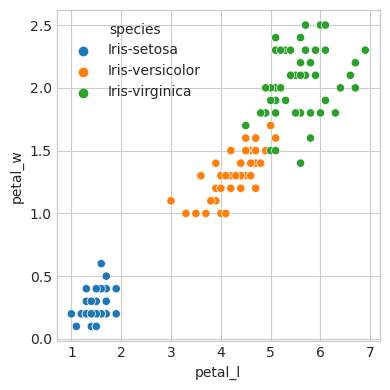

In [9]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(4, 4))

sns.scatterplot(data=df, x="petal_l", y="petal_w", ax=ax, hue="species")

plt.tight_layout()

De acuerdo al anterior analísis, **los modelos en el presente notebook se construirán con base en al ancho del pétalo y su longitud**. 

In [10]:
df_model = df.drop(['sepal_l','sepal_w'], axis=1)

In [11]:
df_model

,petal_l,petal_w,species,target
0,1.4,0.2,Iris-setosa,0
1,1.4,0.2,Iris-setosa,0
2,1.3,0.2,Iris-setosa,0
3,1.5,0.2,Iris-setosa,0
4,1.4,0.2,Iris-setosa,0
...,...,...,...,...
145,5.2,2.3,Iris-virginica,2
146,5.0,1.9,Iris-virginica,2
147,5.2,2.0,Iris-virginica,2
148,5.4,2.3,Iris-virginica,2


# 4. Preparación del dataset para modelamiento

### X
Este conjunto de datos contiene las variables predictoras (features) que se utilizarán para entrenar el modelo. Consta de varias columnas que representan diferentes características o atributos, y cada fila corresponde a una observación o registro diferente.

### Y
Este conjunto de datos contiene la variable objetivo (target) que se está tratando de predecir. y es una serie que generalmente tiene valores discretos o continuos. 

In [12]:
X = df_model.drop(['species','target'], axis=1)
Y = df_model['target']

In [13]:
X.head()

,petal_l,petal_w
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


- Se utiliza el método `values` en los DataFrame de pandas para obtener los valores almacenados en sus celdas en forma de matriz NumPy.
- La matriz resultante es una representación de los datos del DataFrame sin las etiquetas de fila y columna.
- Esto resulta útil ya que los modelos esperan como tipo de dato de entrada una matriz númerica.

In [14]:
X = X.values
Y = Y.values

In [15]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5. Baseline Model

### ¿Qué es un baseline model?

- Un **baseline model** es un modelo sencillo que se utiliza como punto de partida en un problema de predicción.
- Se plantea con la finalidad de tener un **punto de referencia** que permita comparar el desempeño de modelos más complejos.
- Se construye rápidamente sin necesidad de hacer una exploración exhaustiva de los datos o de seleccionar cuidadosamente las características.

### ¿Cuál es el modelo más sencillo para este dataset?

- En este caso, se plantea un **modelo simple que adivine al azar la especie de la flor**, osea, que adivine una sola especie para cada punto de datos.
- Ya que se tiene 3 clases diferentes, equilibradas por igual, se puede esperar tener una exactitud del modelo de 0,33 o 33%.
- Así que esto es lo mínimo que cualquier modelo desarrollado debe alcanzar, **si el modelo no tiene al menos un 33% de exactitud, entonces sería mejor adivinar al azar.**

# 6. Modelo Manual

Para tener una comprensión inicial de lo que hacen los modelos de machine learning, podemos construir un modelo manual en función de la longitud del pétalo y la grafica que nos brindó el analisis exploratorio.

Se define y utliza una regla fácilmente interpretable como lo es:

- Si el petalo tiene una longitud menor a 2.5cm -> Setosa.
- Si el petalo tiene una longitud mayor a 2.5cm y menor a 5cm -> Versicolor.
- Si el petalo tiene una longitud mayor a 5cm -> Virginica.

El modelo se graficaría asi

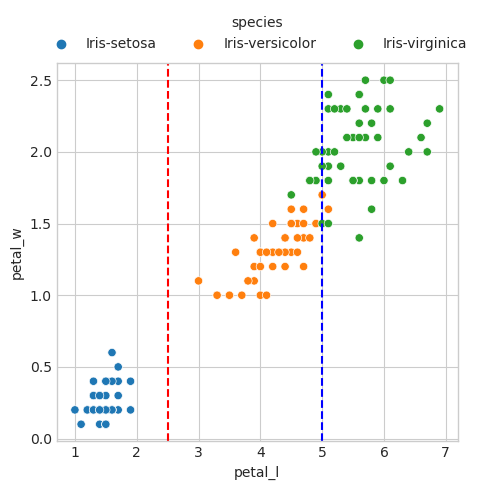

In [16]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))

sns.scatterplot(data=df, x="petal_l", y="petal_w", ax=ax, hue="species")
ax.axvline(x=2.5, color='r', linestyle='--')
ax.axvline(x=5, color='b', linestyle='--')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, frameon=False)

plt.tight_layout()

Mediante un slicing a la matriz, se selecciona solo la longitud del pétalo

In [17]:
petal_l = X[:,0]
petal_l

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

## 6.1. Definición y aplicación

In [18]:
def manual_model(petal_l):
    if petal_l < 2.5:
        return 0
    elif petal_l < 5:
        return 1
    else:
        return 2

In [19]:
manual_pred = np.array([])

for i in petal_l:
    pred_i = manual_model(i)
    manual_pred = np.append(manual_pred, pred_i)

## 6.2. Resultados

In [20]:
manual_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

## 6.3. Evaluación

In [21]:
manual_pred == Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False,

In [22]:
np.mean(manual_pred == Y)

0.9466666666666667

In [23]:
manual_score = np.mean(manual_pred == Y)
print(f'Exactitud del modelo manual: {manual_score*100:.2f}%')

Exactitud del modelo manual: 94.67%


## 6.4. Comentarios
- El modelo manual es muy básico, utiliza una sola variable y una única función, sin embargo llega a una exactitud del 94%.
- Aunque resulte sorprendente, a partir de estos razonamiento y condicionales simples se construyen algunos modelos de aprendizaje automático, sólo que todo lo desarrollan automáticamente y lo hacen por usted, pero bajo el capó.
- i.e.: Definiendo muchas declaraciones if-else se construyen los árboles de decisión, que son modelos muy populares de aprendizaje automático.

# 7. Modelo con Regresión Lógistica

In [24]:
from sklearn.linear_model import LogisticRegression

### ¿Qué es la regresión logística?

- La regresión logística es un algoritmo de aprendizaje automático que se utiliza para predecir la probabilidad de que ocurra un evento determinado, como por ejemplo si un correo electrónico es spam o no.
- A diferencia de la regresión lineal que predice valores numéricos continuos, la regresión logística predice una probabilidad entre 0 y 1, y se utiliza principalmente en problemas de clasificación binaria (sí/no, verdadero/falso).

### Función sigmoide
- Para hacer una predicción, la regresión logística utiliza una función matemática que transforma las características (features) de entrada en una probabilidad de salida.
- Esta función se llama función sigmoide y es una curva en forma de S que mapea cualquier valor real a un valor entre 0 y 1. Una vez que se calcula la probabilidad de salida, se puede establecer un umbral (*Threshold value*) para clasificar el resultado en una de las dos clases.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression3.png" width="500" alt="logo" style="display:block;margin:auto;">

### Aplicaciones
- La regresión logística se utiliza comúnmente en problemas de ciencias sociales, biología, medicina y otras áreas donde se requiere predecir eventos binarios.
- También se utiliza en combinación con otros algoritmos de aprendizaje automático para mejorar la precisión de las predicciones.

## 7.1. Entrenamiento y evaluación del modelo mediante un set de evaluación

<img src="https://velog.velcdn.com/images/amin/post/689f2e19-6b83-42d0-981b-9d9e6aae5fea/image.jpg" width="500" alt="logo" style="display:block;margin:auto;">

### Generación del set de entrenamiento y evaluación

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [27]:
print(f'Nro. muestras entrenamiento: {X_train.shape[0]}\nNro. de muestras evaluación: {X_test.shape[0]}')

Nro. muestras entrenamiento: 120
Nro. de muestras evaluación: 30


### Entrenamiento

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train, Y_train)

LogisticRegression()

### Rendimiento en conjunto de evaluación

In [30]:
Y_pred = model.predict(X_test)

In [31]:
Y_pred

array([1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 1, 0])

In [32]:
np.mean(Y_pred == Y_test)

1.0

In [33]:
model.score(X_test, Y_test)

1.0

## 7.2. Evaluación del modelo mediante validación cruzada

<img src="https://zitaoshen.rbind.io/project/machine_learning/machine-learning-101-cross-vaildation/featured.png" width="500" alt="logo" style="display:block;margin:auto;">

In [34]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [35]:
performance = cross_val_score(model, X, Y, cv=5, scoring='accuracy')

In [36]:
performance

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [37]:
np.mean(performance)

0.96

## 7.3. Identificación de valores mal clasificados

In [38]:
Y_pred = cross_val_predict(model, X, Y, cv=5)

In [39]:
Y_pred == Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

mask

In [40]:
correct_mask = (Y_pred == Y)
wrong_mask = ~correct_mask

In [41]:
X[wrong_mask]

array([[4.8, 1.8],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.7],
       [5. , 1.5],
       [5.1, 1.5]])

In [42]:
df_pred = df_model.copy()
df_pred['pred'] = Y_pred
df_pred['correct_pred'] = correct_mask

In [43]:
filt = (df_pred['correct_pred']==False)
df_pred.loc[filt]

,petal_l,petal_w,species,target,pred,correct_pred
70,4.8,1.8,Iris-versicolor,1,2,False
77,5.0,1.7,Iris-versicolor,1,2,False
83,5.1,1.6,Iris-versicolor,1,2,False
106,4.5,1.7,Iris-virginica,2,1,False
119,5.0,1.5,Iris-virginica,2,1,False
133,5.1,1.5,Iris-virginica,2,1,False


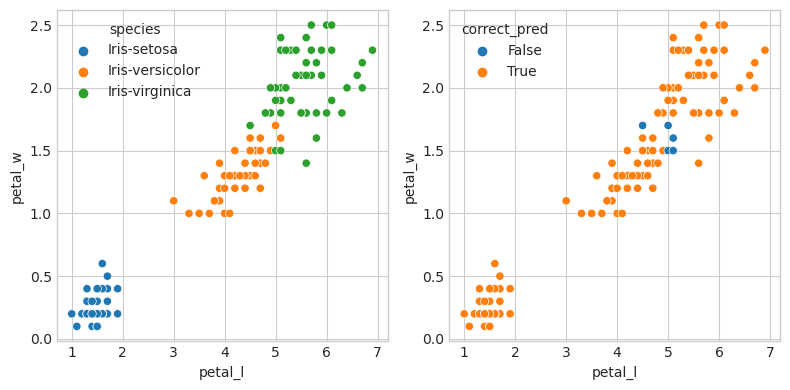

In [44]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True)

sns.scatterplot(data=df_pred, x="petal_l", y="petal_w", ax=ax[0], hue="species")

sns.scatterplot(data=df_pred, x="petal_l", y="petal_w", ax=ax[1], hue="correct_pred")

plt.tight_layout()

## 8. Conclusiones

- El modelo de regresión logística es efectivo en la predicción de la especie de la flor Iris en función de sus medidas de longitud y ancho de pétalos (97%).
- Debido a la selección adecuada de features, definidas en función d]el análisis exploratorio de datos, se pudo construir un modelo manual que también cuenta con gran exactitud (95%). 
- Ambos modelos superan al baseline de predicción al azar (33%)